In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sb

Load Churn Prediction Dataset

In [3]:
import pandas as pd
from IPython.display import display

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Customer Churn Prediction.csv')

# Set max columns display option
pd.set_option('display.max_columns', None)

# Display DataFrame in tabular form
display(df)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Preprocess Dataset

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [6]:
# we didn't require customerID so we drop it
df = df.drop('customerID',axis=1)

In [7]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


Checking Null Values in Customer Churn Data

In [8]:
# checking null value
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [10]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

Handling categorical Variables in Customer Churn Data

In [12]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [13]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [15]:
for i in cat:
    df[i] = df[i].astype(str)

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['InternetService'] = label.fit_transform(df['InternetService'])
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])
display(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [18]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])
display(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,1,0,1,1,1,1,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,2,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,0,1,1,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,2,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


Independent and Dependent Variables

In [25]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [27]:
# independent and dependent variables
x = df.drop('Churn',axis=1)
y = df['Churn']

Splitting data

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(5634, 19)
(1409, 19)


Building Neural Network for Customer Churn Data

In [29]:
# now we create our artificial neural net.
# import tensorflow
import tensorflow as tf
#import keras
from tensorflow import keras

 Define Model

In [30]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [44]:
from tensorflow import keras

# Define Sequential model
model = keras.Sequential([
    # Input layer
    keras.layers.Dense(64, input_shape=(19,), activation='relu'),
    # Batch normalization layer
    keras.layers.BatchNormalization(),
    # Hidden layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout layer for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    # Output layer
    keras.layers.Dense(1, activation='sigmoid')
])



Compile the Customer Churn Model

In [45]:
print(f"Type of xtrain: {type(xtrain)}")
print(f"Type of ytrain: {type(ytrain)}")

Type of xtrain: <class 'numpy.ndarray'>
Type of ytrain: <class 'numpy.ndarray'>


In [46]:
xtrain = np.asarray(xtrain).astype('float32')
ytrain = np.asarray(ytrain).astype('float32')

In [47]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
177/177 [==============================] - 4s 4ms/step - loss: 0.5459 - accuracy: 0.7313
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.7840
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.7882
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.7969
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7918
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.8024
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8058
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8049
Epoch 9/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.7993
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4026 - accura

In [48]:
xtest = np.asarray(xtest).astype('float32')
ytest = np.asarray(ytest).astype('float32')

In [49]:
model.evaluate(xtest,ytest)

45/45 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7516


[0.6130367517471313, 0.7515968680381775]

In [50]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

45/45 [==============================] - 0s 2ms/step
[[0.73460644]
 [0.94669837]
 [0.01384164]
 ...
 [0.11521178]
 [0.02082143]
 [0.99106973]]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

In [51]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
0,0.0,1
1,1.0,1
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,1
7,0.0,0
8,0.0,0
9,0.0,0


Performance Matrices

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1066
         1.0       0.49      0.51      0.50       343

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.76      0.75      0.75      1409



Text(33.22222222222222, 0.5, 'True_number')

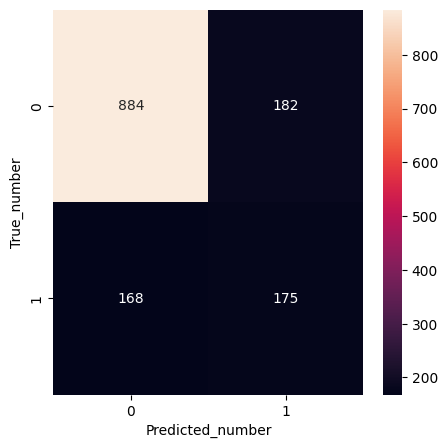

In [52]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
plt.figure(figsize = (5,5))
sb.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')